In [326]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date
import warnings 
warnings.simplefilter("ignore")

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

dtype('O')

In [497]:
train = pd.read_csv('Yassir_Data - Visible/Train.csv').sample(frac=.2)
train.shape

(16785, 8)

In [419]:
train.shape

(8392, 8)

In [420]:
train.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
26921,BJ0JA96W,2019-12-09T20:27:33Z,3.043,36.723,3.104,36.616,23365,1370
27219,BNNCVXIT,2019-12-01T21:08:58Z,3.190,36.715,3.207,36.698,3884,444
48412,KU1M4ECE,2019-11-25T20:28:55Z,3.284,36.786,3.339,36.743,10341,872
7342,332HYJ9Z,2019-12-13T21:48:16Z,3.032,36.749,3.028,36.690,13568,1228
62296,QQD0U48A,2019-11-22T21:44:36Z,3.002,36.739,3.029,36.758,5905,607


In [421]:
train.tail()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
80469,YILZ1OQT,2019-12-05T20:21:32Z,3.055,36.774,2.900,36.804,24413,2292
41495,HU0U6NPN,2019-12-15T05:02:41Z,2.928,36.762,3.062,36.781,17960,1388
48059,KOI64R1B,2019-12-12T21:43:59Z,3.194,36.744,3.048,36.647,25985,1663
1241,0IA10TF9,2019-11-23T21:47:27Z,3.207,36.698,2.923,36.763,32577,1915
62270,QQ37T038,2019-11-29T20:16:00Z,3.040,36.741,3.039,36.741,314,80


In [422]:
train.columns

Index(['ID', 'Timestamp', 'Origin_lat', 'Origin_lon', 'Destination_lat',
       'Destination_lon', 'Trip_distance', 'ETA'],
      dtype='object')

In [423]:
train.dtypes

ID                  object
Timestamp           object
Origin_lat         float64
Origin_lon         float64
Destination_lat    float64
Destination_lon    float64
Trip_distance        int64
ETA                  int64
dtype: object

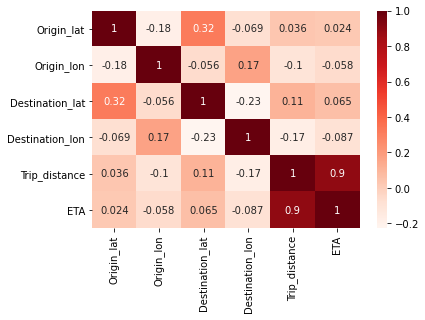

In [424]:
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

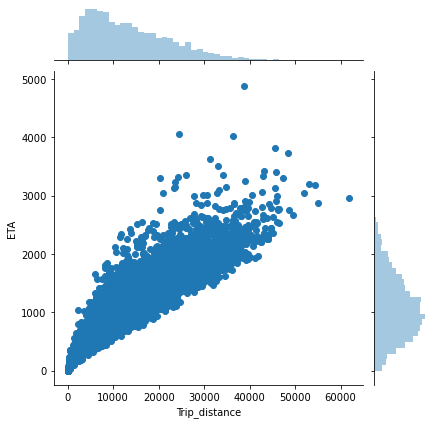

In [425]:
sns.jointplot(data=train, x='Trip_distance', y='ETA')

In [498]:
train.Timestamp.dtype
train['Timestamp'] = pd.to_datetime(train['Timestamp'])
train.tail()#change timestamp column to datetime objects

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
30635,D6M8WXAK,2019-11-30 20:32:31+00:00,3.180,36.725,3.200,36.703,6020,528
55484,NWBBWHDU,2019-12-16 05:36:41+00:00,3.186,36.723,3.012,36.747,21624,1709
60329,PX71DZQN,2019-12-11 22:03:13+00:00,3.076,36.741,3.034,36.735,6699,427
40656,HHBG4VTZ,2019-11-26 22:59:52+00:00,3.203,36.699,3.033,36.683,18923,1181
32467,DYAPK9NA,2019-11-21 23:33:46+00:00,3.037,36.771,3.036,36.805,9367,1122


In [427]:
train.duplicated().sum() #No duplicated values
train.tail()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
80469,YILZ1OQT,2019-12-05 20:21:32+00:00,3.055,36.774,2.900,36.804,24413,2292
41495,HU0U6NPN,2019-12-15 05:02:41+00:00,2.928,36.762,3.062,36.781,17960,1388
48059,KOI64R1B,2019-12-12 21:43:59+00:00,3.194,36.744,3.048,36.647,25985,1663
1241,0IA10TF9,2019-11-23 21:47:27+00:00,3.207,36.698,2.923,36.763,32577,1915
62270,QQ37T038,2019-11-29 20:16:00+00:00,3.040,36.741,3.039,36.741,314,80


ID                 0
Timestamp          0
Origin_lat         0
Origin_lon         0
Destination_lat    0
Destination_lon    0
Trip_distance      0
ETA                0
dtype: int64


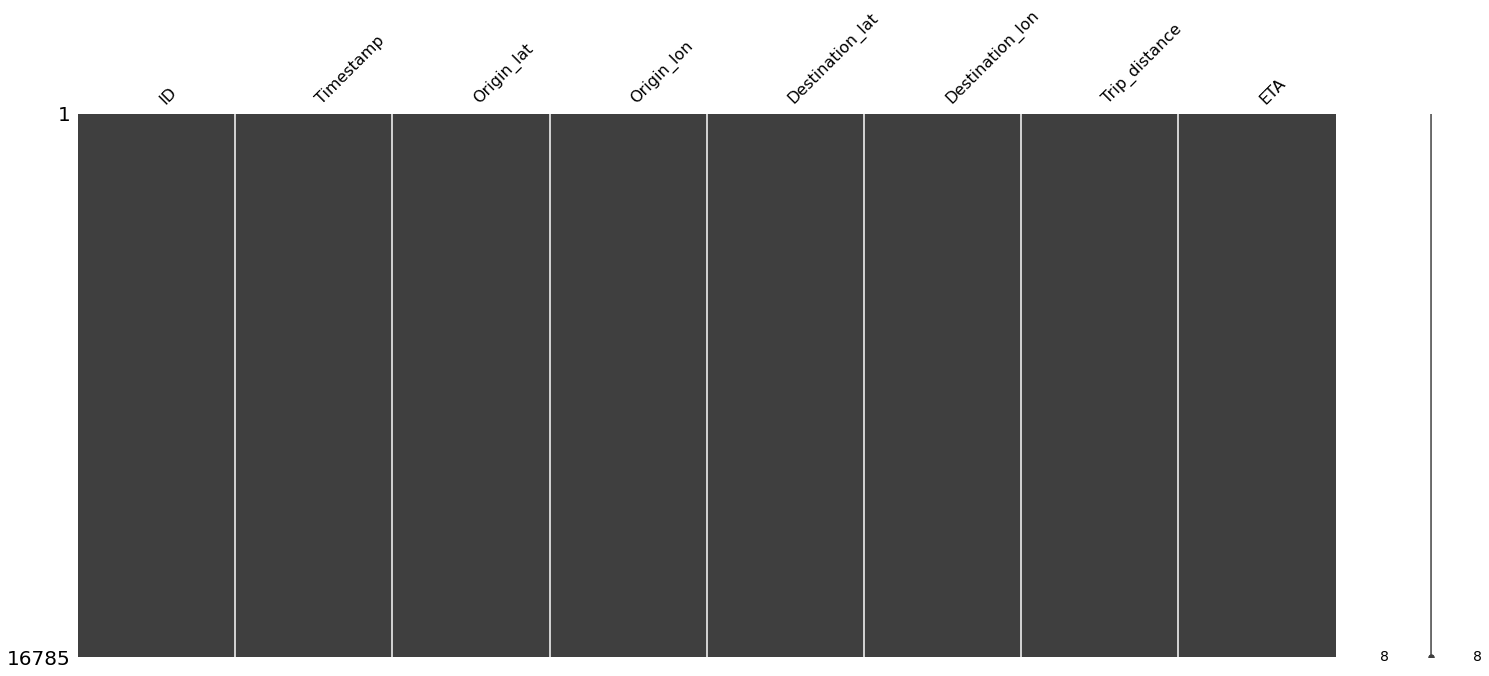

In [499]:
import missingno as msno

msno.matrix(train)
print(train.isnull().sum()) #No missing value

In [500]:
train_timestamp = train.set_index('Timestamp', drop=True)
train_timestamp['hour'] = train_timestamp.index.hour
train_timestamp.head()
train_timestamp.tail()
train_timestamp.shape

(16785, 8)

In [136]:
np.where?

In [501]:
train_timestamp['weekday'] = train_timestamp.index.weekday
train_timestamp['is_weekend'] = np.where((train_timestamp.weekday == 5) | (train_timestamp.weekday == 6), 'Yes', 'No')
train_timestamp.head()
train_timestamp.shape

(16785, 10)

In [431]:
train_timestamp.hour.value_counts()

20    1921
21    1515
22    1261
23    1027
5      768
0      659
1      351
4      350
3      283
2      257
Name: hour, dtype: int64

In [432]:
train_timestamp.weekday.value_counts()

3    1449
2    1317
4    1235
5    1138
6    1105
1    1094
0    1054
Name: weekday, dtype: int64

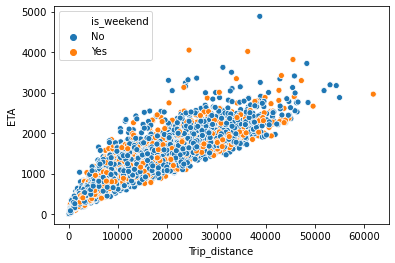

In [433]:
train_timestamp.is_weekend.value_counts()
sns.scatterplot(data=train_timestamp, x=train_timestamp.Trip_distance, y=train_timestamp.ETA, hue=train_timestamp.is_weekend)

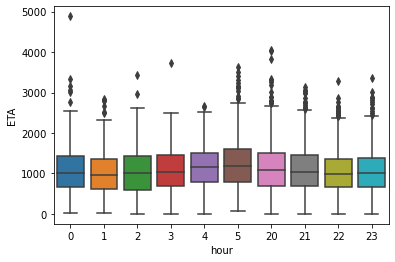

In [434]:
sns.boxplot(data=train_timestamp, x=train_timestamp.hour, y=train_timestamp.ETA)


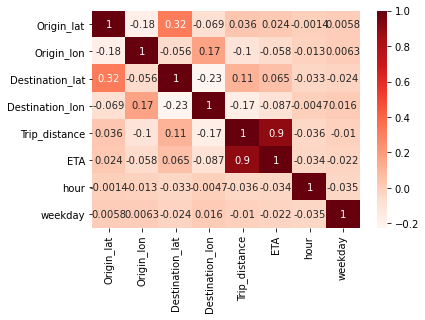

In [435]:
train_timestamp.corr()
sns.heatmap(train_timestamp.corr(), annot=True, cmap=plt.cm.Reds)

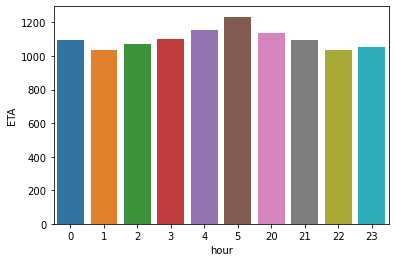

In [436]:
with_hours = train_timestamp.groupby('hour', as_index=False).agg({'ETA': 'mean'})
sns.barplot(data=with_hours, x=with_hours.hour, y=with_hours.ETA)

In [437]:
train_timestamp.head()

,ID,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,hour,weekday,is_weekend
Timestamp,,,,,,,,,,
2019-12-09 20:27:33+00:00,BJ0JA96W,3.043,36.723,3.104,36.616,23365,1370,20,0,No
2019-12-01 21:08:58+00:00,BNNCVXIT,3.190,36.715,3.207,36.698,3884,444,21,6,Yes
2019-11-25 20:28:55+00:00,KU1M4ECE,3.284,36.786,3.339,36.743,10341,872,20,0,No
2019-12-13 21:48:16+00:00,332HYJ9Z,3.032,36.749,3.028,36.690,13568,1228,21,4,No
2019-11-22 21:44:36+00:00,QQD0U48A,3.002,36.739,3.029,36.758,5905,607,21,4,No


In [502]:
coordinates_origin = train_timestamp[['Origin_lat', 'Origin_lon']]
coordinates_dest = train_timestamp[['Destination_lat', 'Destination_lon']]

In [439]:
coordinates_origin.head()

,Origin_lat,Origin_lon
Timestamp,,
2019-12-09 20:27:33+00:00,3.043,36.723
2019-12-01 21:08:58+00:00,3.190,36.715
2019-11-25 20:28:55+00:00,3.284,36.786
2019-12-13 21:48:16+00:00,3.032,36.749
2019-11-22 21:44:36+00:00,3.002,36.739


In [503]:
coordinates_origin_norm = MinMaxScaler().fit_transform(coordinates_origin) # this line scales our data
coordinates_dest_norm = MinMaxScaler().fit_transform(coordinates_dest)

coordinates_origin_norm = pd.DataFrame(              #this pops it back in data frame format 
                    coordinates_origin_norm,
                    columns=coordinates_origin.columns)
coordinates_dest_norm = pd.DataFrame(
                    coordinates_dest_norm,
                    columns=coordinates_dest.columns)

coordinates_origin_norm.head()

,Origin_lat,Origin_lon
0,0.365079,0.574561
1,0.705467,0.478070
2,0.386243,0.609649
3,0.421517,0.456140
4,0.386243,0.605263


In [504]:
def evaluate_k_kmeans_inertia(k, data):
    print(f"running Kmeans with k={k}")
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(data)
    return estimator_kmeans.inertia_



range_k = [2, 3, 4, 5, 8, 10, 15, 20, 25, 30]
results_k = {}
results_k1 = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k, coordinates_origin_norm)
    results_k1[k] = evaluate_k_kmeans_inertia(k, coordinates_dest_norm)

running Kmeans with k=2
running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=5
running Kmeans with k=8
running Kmeans with k=8
running Kmeans with k=10
running Kmeans with k=10
running Kmeans with k=15
running Kmeans with k=15
running Kmeans with k=20
running Kmeans with k=20
running Kmeans with k=25
running Kmeans with k=25
running Kmeans with k=30
running Kmeans with k=30


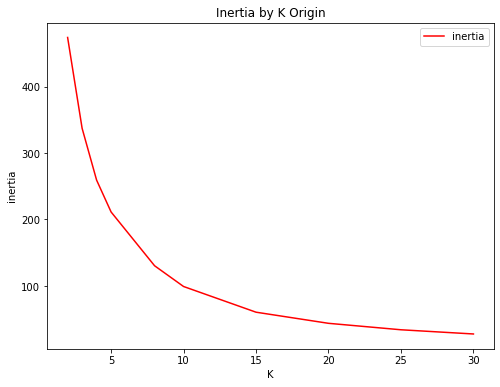

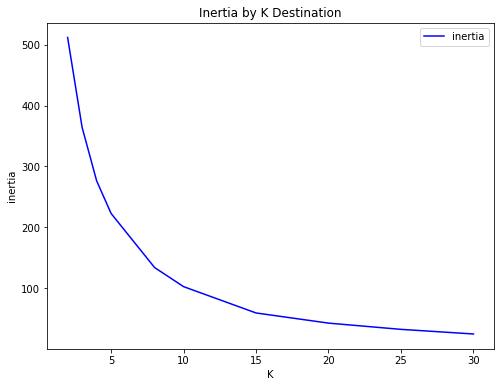

In [505]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K Origin")
ax.legend()

fig1, ax1 = plt.subplots(figsize=(8,6))
ax1 = sns.lineplot(
        [c[0] for c in results_k1.items()],
        [c[1] for c in results_k1.items()], label = "inertia", color="blue")
ax1.set_xlabel("K")
ax1.set_ylabel("inertia")
ax1.set_title("Inertia by K Destination")
ax1.legend()

In [506]:
k_means = KMeans(random_state=42, n_clusters=20)
k_means1 = KMeans(random_state=42, n_clusters=20)
k_means.fit(coordinates_origin_norm)
k_means1.fit(coordinates_dest_norm)

KMeans(n_clusters=20, random_state=42)

In [507]:
k_means.predict(coordinates_origin_norm)
k_means1.predict(coordinates_dest_norm)

array([16,  3,  6, ..., 13, 15, 19], dtype=int32)

In [508]:
train_timestamp["Origin_cluster_id"] = k_means.labels_
train_timestamp["Destination_cluster_id"] = k_means1.labels_
train_timestamp.shape

(16785, 12)

In [509]:
silhouette_score(coordinates_origin_norm, k_means.labels_)

0.4099108866911068

In [510]:
silhouette_score(coordinates_dest_norm, k_means1.labels_)

0.462231464988796

In [511]:
calinski_harabasz_score(coordinates_origin_norm, k_means.labels_)

15585.725125341327

In [512]:
calinski_harabasz_score(coordinates_dest_norm, k_means1.labels_)

17993.708293401723

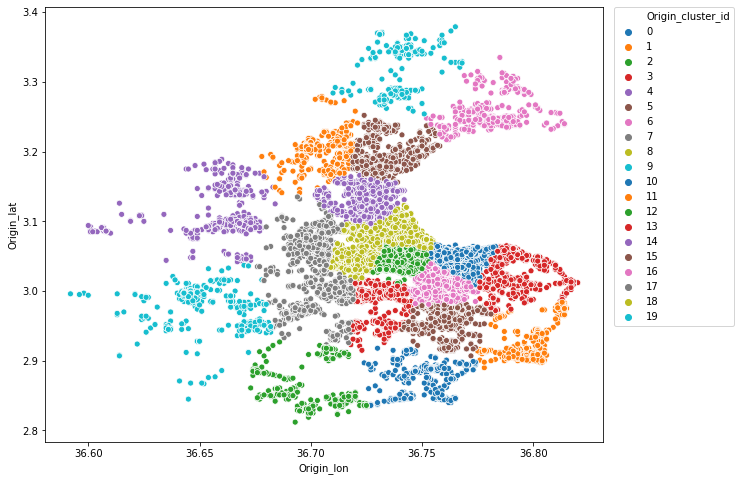

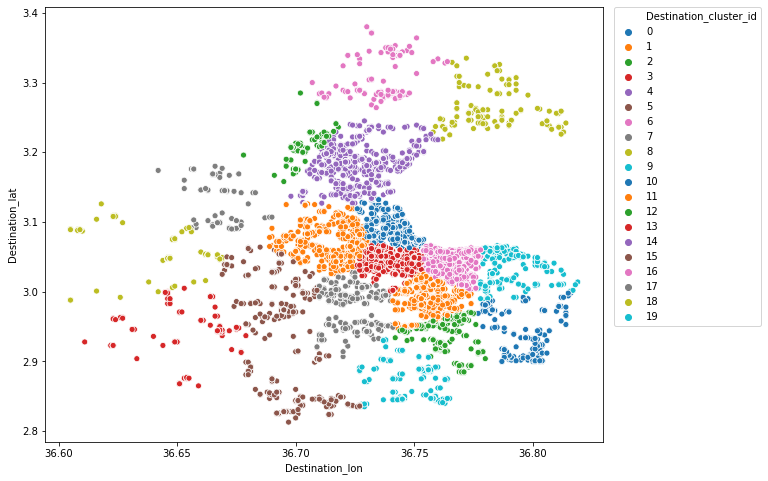

In [513]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(data=train_datetime, 
                     x=train_timestamp.Origin_lon, 
                     y=train_timestamp.Origin_lat, 
                     hue=train_timestamp.Origin_cluster_id,
                     palette=sns.color_palette("tab10", 20))
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper_left', borderaxespad=0)

fig1, ax1 = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(data=train_datetime, 
                     x=train_timestamp.Destination_lon, 
                     y=train_timestamp.Destination_lat, 
                     hue=train_timestamp.Destination_cluster_id,
                     palette=sns.color_palette("tab10", 20))
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper_left', borderaxespad=0)

In [451]:
train_timestamp.shape

(8392, 12)

In [514]:
train_timestamp = train_timestamp.drop(["ID", "weekday", "Origin_lat", "Origin_lon", "Destination_lat", "Destination_lon"], axis=1)


In [453]:
train_timestamp.shape

(8392, 6)

In [515]:
train_timestamp["hour"] = train_timestamp["hour"].astype(object)
train_timestamp["Origin_cluster_id"] = train_timestamp["Origin_cluster_id"].astype(object)
train_timestamp["Destination_cluster_id"] = train_timestamp["Destination_cluster_id"].astype(object)

In [516]:
train_timestamp.dtypes
train_timestamp.shape

(16785, 6)

In [402]:

#train_timestamp.head()
train_timestamp.tail()

,Trip_distance,ETA,hour,is_weekend,Origin_cluster_id,Destination_cluster_id
Timestamp,,,,,,
2019-12-02 22:37:36+00:00,21550,1712,22,No,3,3
2019-11-28 20:41:13+00:00,15607,826,20,No,6,18
2019-12-13 23:02:47+00:00,18536,1233,23,No,12,12
2019-12-09 00:43:42+00:00,9702,1188,0,No,10,13
2019-12-05 23:36:46+00:00,12662,838,23,No,9,19


In [517]:
target = "ETA"
num_data = train_timestamp[["Trip_distance"]]
target_data = train_timestamp[target]
cat_data = cat_data.select_dtypes(object)
num_data.shape

(16785, 1)

In [521]:
cat_data_dummy = pd.get_dummies(cat_data, drop_first=True)

In [522]:
cat_data_dummy.shape

(8392, 48)

In [520]:
train_processed = pd.concat([cat_data_dummy.reset_index(drop=True), num_data.reset_index(drop=True)], axis=1)
train_processed.shape

(16785, 49)

In [523]:
X_train, X_test, y_train, y_test = train_test_split(train_processed, 
                                                    target_data, 
                                                    test_size=0.2,
                                                    random_state=11
                                                   )

In [524]:
ridge_reg = Ridge()

In [525]:
def evaluate_model(estimator, X, y):  
    cv_results = cross_validate(estimator, X, y,  
                     scoring="r2", 
                          n_jobs=-1, cv=3,
                     return_train_score=True)
    return pd.DataFrame(cv_results).mean().to_dict()

In [526]:
search_parameters_space_random = {
    "alpha": uniform(loc=0.1, scale=10), 
    "fit_intercept": [True, False]
}


In [527]:
random_search_ridge = RandomizedSearchCV(
    estimator=ridge_reg, 
    param_distributions=search_parameters_space_random,
   scoring="r2", n_jobs=-1, 
    n_iter=50)

In [528]:
random_search.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [489]:
random_search.best_score_

0.8014806665508617

In [490]:
random_search.best_estimator_

Ridge(alpha=9.973365745378697)

In [491]:
pd.DataFrame(random_search.cv_results_).sort_values(by="rank_test_score").T

,44,8,26,0,35,31,18,9,36,33,...,39,17,27,45,37,38,13,1,40,2
mean_fit_time,0.0150849,0.0266238,0.0218455,0.0244407,0.0159857,0.0147633,0.0133201,0.0369996,0.01434,0.0152708,...,0.0128541,0.0125693,0.0217946,0.0139771,0.0138392,0.0149097,0.0124016,0.0177278,0.0142646,0.0193254
std_fit_time,0.00210402,0.0153282,0.00637422,0.00605126,0.00229334,0.000572861,0.00197235,0.0175134,0.00162082,0.00188461,...,0.00117819,0.0011948,0.00573069,0.00100067,0.00105562,0.0034643,0.000988753,0.00166399,0.00163748,0.00426337
mean_score_time,0.00633645,0.0274055,0.00687885,0.00650849,0.00591102,0.00563474,0.00543952,0.0234156,0.00557261,0.00545588,...,0.00528841,0.00470042,0.00859599,0.00509639,0.00509491,0.00527124,0.00562568,0.00634561,0.00547137,0.00562582
std_score_time,0.00302321,0.0247203,0.00358943,0.00186862,0.00103815,0.000415659,0.00042773,0.0135684,0.000907592,0.000762346,...,0.000802688,0.000493189,0.00378968,0.000522834,0.000309132,0.000889247,0.00094767,0.000904703,0.000817094,0.000898844
param_alpha,9.97337,9.67893,9.46933,9.06032,8.44056,8.00079,7.76792,6.75836,6.67251,4.40503,...,6.49119,7.38602,8.5342,8.64625,8.67174,8.77738,9.43699,9.6608,9.87976,9.90382
param_fit_intercept,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
params,"{'alpha': 9.973365745378697, 'fit_intercept': ...","{'alpha': 9.678933272187132, 'fit_intercept': ...","{'alpha': 9.469326465403732, 'fit_intercept': ...","{'alpha': 9.060324417166294, 'fit_intercept': ...","{'alpha': 8.440564300187674, 'fit_intercept': ...","{'alpha': 8.000787414664691, 'fit_intercept': ...","{'alpha': 7.767920509150974, 'fit_intercept': ...","{'alpha': 6.758362200430625, 'fit_intercept': ...","{'alpha': 6.672505873776589, 'fit_intercept': ...","{'alpha': 4.4050331080559015, 'fit_intercept':...",...,"{'alpha': 6.491186956693638, 'fit_intercept': ...","{'alpha': 7.386016040803071, 'fit_intercept': ...","{'alpha': 8.534200578936424, 'fit_intercept': ...","{'alpha': 8.646251019112382, 'fit_intercept': ...","{'alpha': 8.67174450437354, 'fit_intercept': F...","{'alpha': 8.7773774442382, 'fit_intercept': Fa...","{'alpha': 9.436990551222157, 'fit_intercept': ...","{'alpha': 9.660799562741305, 'fit_intercept': ...","{'alpha': 9.879757688185352, 'fit_intercept': ...","{'alpha': 9.903823459974394, 'fit_intercept': ..."
split0_test_score,0.799493,0.799487,0.799483,0.799474,0.79946,0.79945,0.799445,0.799421,0.799419,0.79936,...,0.787498,0.787535,0.787575,0.787579,0.787579,0.787582,0.7876,0.787606,0.787611,0.787612
split1_test_score,0.804219,0.804214,0.80421,0.804202,0.804191,0.804182,0.804177,0.804156,0.804155,0.804103,...,0.793489,0.79348,0.793465,0.793464,0.793463,0.793462,0.793452,0.793448,0.793445,0.793444
split2_test_score,0.7875,0.787491,0.787485,0.787474,0.787456,0.787442,0.787435,0.787403,0.7874,0.787318,...,0.778908,0.778831,0.778731,0.778721,0.778719,0.77871,0.778652,0.778632,0.778613,0.778611


In [492]:
RESULTS = {}
RESULTS["Random_Search_Ridge"] = evaluate_model(random_search, X_test, y_test)
RESULTS

{'Random_Search_Ridge': {'fit_time': 2.797899087270101,
  'score_time': 0.0031609535217285156,
  'test_score': 0.7981207974880175,
  'train_score': 0.8127026631289386}}

In [473]:
from sklearn.ensemble import RandomForestRegressor

In [493]:
estimator_randomforest = RandomForestRegressor(n_estimators=100)

In [494]:
estimator_randomforest.fit(X_train, y_train)

RandomForestRegressor()

In [495]:
RESULTS["randomforest_100"] = evaluate_model(estimator_randomforest, X_test, y_test)

In [496]:
pd.DataFrame(RESULTS).T

,fit_time,score_time,test_score,train_score
Random_Search_Ridge,2.797899,0.003161,0.798121,0.812703
randomforest_100,0.811257,0.031684,0.802238,0.972198
